In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir('..')

In [2]:
from src.dataPipeline import DataPipeline as DataPipeline
import yaml
from sklearn.impute import KNNImputer

dp = DataPipeline()
dp.readCsv('data/immo_data_202208_v2.csv')
dp.mergeColumns()

# Read configuration file
with open('src/params.yaml', 'r', encoding='utf-8') as file:
    params = yaml.safe_load(file)
columns_to_drop = params['columns_to_drop_all']

dp.dropColumns(columns_to_drop)
dp.cleanData()
df = dp.getData()

C:\FHNW_Programmiersachen\5_Sem\immo_challenge\src\dataPipeline.py:35: DtypeWarning: Columns (3,4,5,6,11,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,45,46,47,49,50,107,110,114,115,116,119,120,121,124,125,126,128,131,132) have mixed types. Specify dtype option on import or set low_memory=False.
  self.data = pd.read_csv(filePath)
C:\FHNW_Programmiersachen\5_Sem\immo_challenge\src\dataPipeline.py:58: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ]].bfill(axis=1)['Space extracted']
C:\FHNW_Programmiersachen\5_Sem\immo_challenge\src\dataPipeline.py:63: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To o

## Verteilungsanalyse

In [3]:
df

,Availability,Floor,detail_responsive#surface_usable,Floor_space_merged,ForestDensityL,ForestDensityM,ForestDensityS,NoisePollutionRailwayL,NoisePollutionRailwayM,NoisePollutionRailwayS,...,type,Space extracted,plz_parsed,Plot_area_unified,provider,No. of rooms:,Number of apartments:,Last refurbishment:,Year built:,Number of floors:
0,On request,4.0,NaN,NaN,0.511176,0.286451,0.090908,0.000000,0.000000,0.000000,...,penthouse,100.0,5023.0,NaN,Immoscout24.ch,5.0,NaN,NaN,NaN,NaN
1,On request,NaN,NaN,242.0,0.511176,0.286451,0.090908,0.000000,0.000000,0.000000,...,terrace-house,156.0,5023.0,222.0,Immoscout24.ch,5.0,NaN,NaN,NaN,NaN
2,Immediately,2.0,NaN,NaN,0.163362,0.095877,0.001911,0.000000,0.000000,0.000000,...,penthouse,93.0,5022.0,NaN,Immoscout24.ch,5.0,NaN,NaN,NaN,NaN
3,On request,NaN,NaN,257.0,0.511176,0.286451,0.090908,0.000000,0.000000,0.000000,...,detached-house,154.0,5023.0,370.0,Immoscout24.ch,5.0,NaN,NaN,NaN,NaN
4,On request,0.0,NaN,NaN,0.333865,0.279276,0.145835,0.000000,0.000000,0.000000,...,flat,142.0,5022.0,NaN,Immoscout24.ch,5.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22476,NaN,NaN,NaN,NaN,0.495715,0.385885,0.097278,0.000000,0.000000,0.000000,...,Bifamiliar house,102.0,9470.0,140.0,homegate.ch,4.5,2.0,2021.0,1920.0,NaN
22477,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,Terrace flat,250.0,9500.0,NaN,homegate.ch,8.5,NaN,NaN,2022.0,3.0
22478,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.052609,0.083575,0.027766,...,Single house,240.0,9500.0,455.0,homegate.ch,8.5,1.0,2021.0,1966.0,3.0
22479,NaN,NaN,NaN,NaN,0.410843,0.151363,0.038351,0.000000,0.000000,0.000000,...,Terrace flat,175.0,9548.0,NaN,homegate.ch,5.5,NaN,NaN,2022.0,NaN


### Availability

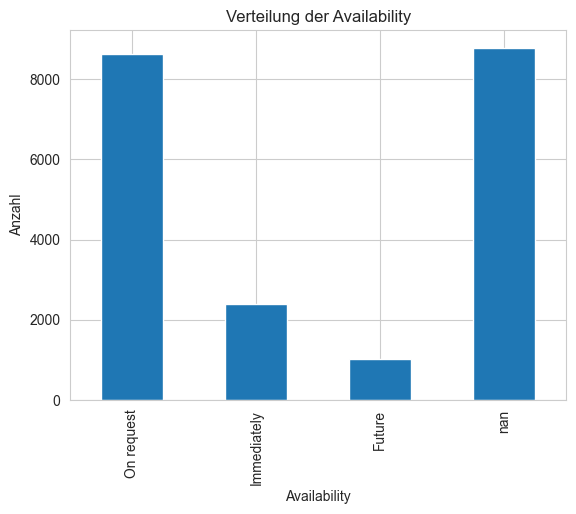

In [4]:
# Verteilung der Availability 
availability = df['Availability'].value_counts()
availability['nan'] = df['Availability'].isnull().sum()
availability.plot(kind='bar')
plt.ylabel('Anzahl')
plt.title('Verteilung der Availability')
plt.show()

Viele der Einträge sind nan-Values. Etwa gleich viele sind auf Anfrage verfügbar. Eine relativ geringe Menge ist sofort verfügbar. Der Wert "Future" wurde imputiert. Jeder definitive Datumswert wurde in Future umgewandelt, damit die Spalte als kategorische Variable interpretiert werden kann. 

### Stockwerk

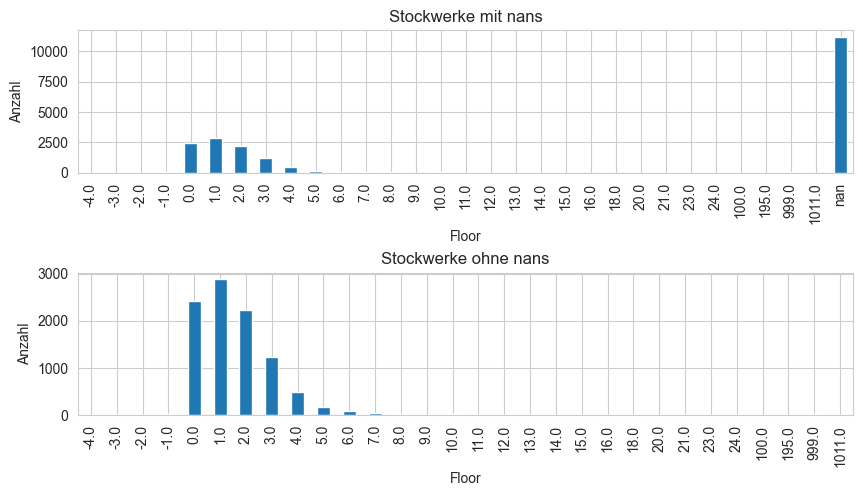

In [5]:
# Verteilung des Stockwerks
fig, axs = plt.subplots(2, 1, figsize=(10, 5))
plt.subplots_adjust(hspace=0.7)
stockwerke = df['Floor'].value_counts()
stockwerke['nan'] = df['Floor'].isnull().sum()
stockwerke.index = stockwerke.index.astype(float)
stockwerke = stockwerke.sort_index()
stockwerke.plot(kind='bar', ax=axs[0])
axs[0].set_ylabel('Anzahl')
axs[0].set_title('Stockwerke mit nans')

stockwerke = df['Floor'].value_counts()
stockwerke.index = stockwerke.index.astype(float)
stockwerke = stockwerke.sort_index()
stockwerke.plot(kind='bar', ax=axs[1])
axs[1].set_ylabel('Anzahl')
axs[1].set_title('Stockwerke ohne nans')
plt.show()

Die meisten Inserate enthalten keine Information über das Stockwerk. Die Verteilung der Stockwerke erinnert an eine Poisson-Verteilung.

### Nutzfläche

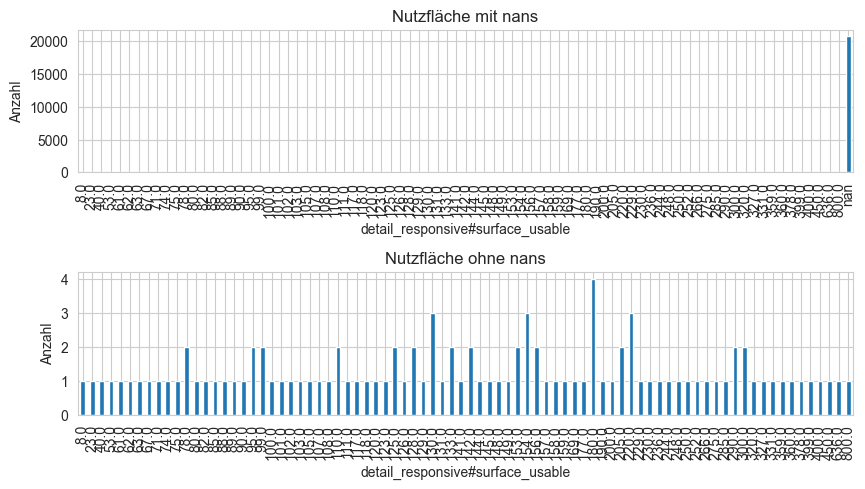

In [6]:
# Verteilung der Nutzfläche
fig, axs = plt.subplots(2, 1, figsize=(10, 5))
plt.subplots_adjust(hspace=0.7)
nutzflaeche = df['detail_responsive#surface_usable'].value_counts()
nutzflaeche['nan'] = df['detail_responsive#surface_usable'].isnull().sum()
nutzflaeche.index = nutzflaeche.index.astype(float)
nutzflaeche = nutzflaeche.sort_index()
nutzflaeche.plot(kind='bar', ax=axs[0])
axs[0].set_ylabel('Anzahl')
axs[0].set_title('Nutzfläche mit nans')

nutzflaeche = df['detail_responsive#surface_usable'].value_counts()
nutzflaeche.index = nutzflaeche.index.astype(float)
nutzflaeche = nutzflaeche.sort_index()
nutzflaeche.plot(kind='bar', ax=axs[1])
axs[1].set_ylabel('Anzahl')
axs[1].set_title('Nutzfläche ohne nans')
plt.show()


Es ist keine Verteilung zu erkennen und es sind zu viele nans vorhanden.

### Floorspace
Ist die Fläche des Stockwerks.

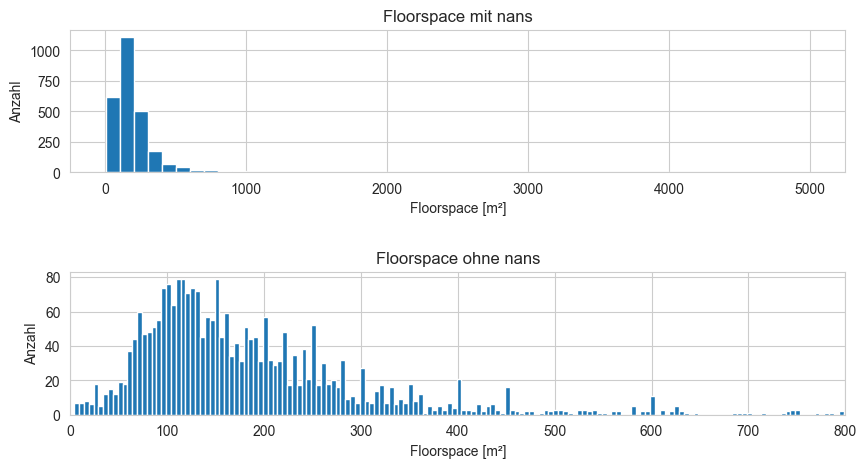

Anzahl nans: 18237


In [7]:
# Verteilung des Floorspace
fig, axs = plt.subplots(2, 1, figsize=(10, 5))
fig.subplots_adjust(hspace=0.7)
axs[0].hist(df['Floor_space_merged'], bins=50)
axs[0].set_ylabel('Anzahl')
axs[0].set_title('Floorspace mit nans')
axs[0].set_xlabel('Floorspace [m²]')

axs[1].hist(df['Floor_space_merged'], bins=1000)
axs[1].set_ylabel('Anzahl')
axs[1].set_xlim(0, 800)
axs[1].set_title('Floorspace ohne nans')
axs[1].set_xlabel('Floorspace [m²]')
plt.show()
print('Anzahl nans:', df['Floor_space_merged'].isnull().sum())

Es fehlen sehr viele Werte. Die Verteilung der Floorspace-Werte ist rechtssteil und linksschief.

### Type

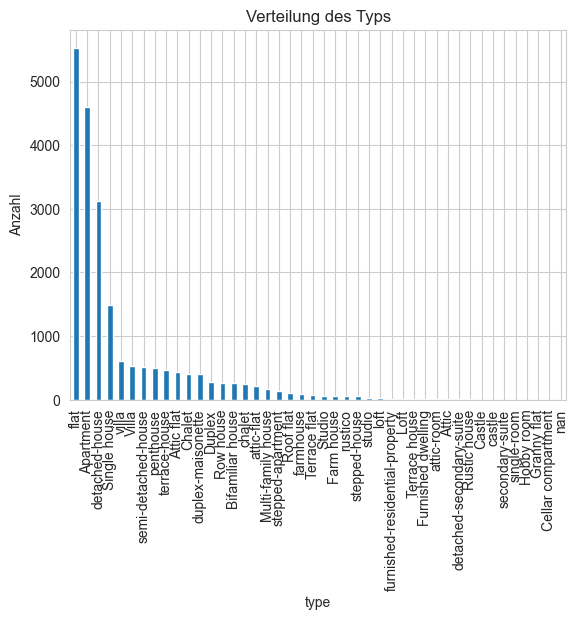

In [8]:
# Verteilung des Typs
type = df['type'].value_counts()
type['nan'] = df['type'].isnull().sum()
type.plot(kind='bar')
plt.ylabel('Anzahl')
plt.title('Verteilung des Typs')
plt.show()

Es hat viele verschiedene Typen. Die meisten sind Wohnungen. Viele der Spaltennamen sind unterschiedlich geschrieben, meinen aber das selbe.

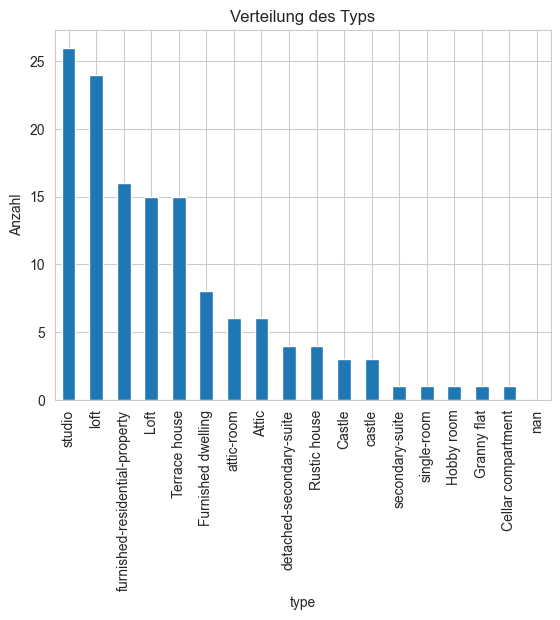

In [9]:
# Verteilung des Typs
type = df['type'].value_counts()
# Nehme nur die wengier häufigen Typen
type = type[type < 40]
type['nan'] = df['type'].isnull().sum()
type.plot(kind='bar')
plt.ylabel('Anzahl')
plt.title('Verteilung des Typs')
plt.show()

Ebenfalls hat es viele Typen welche kaum vertreten sind.

### Preis

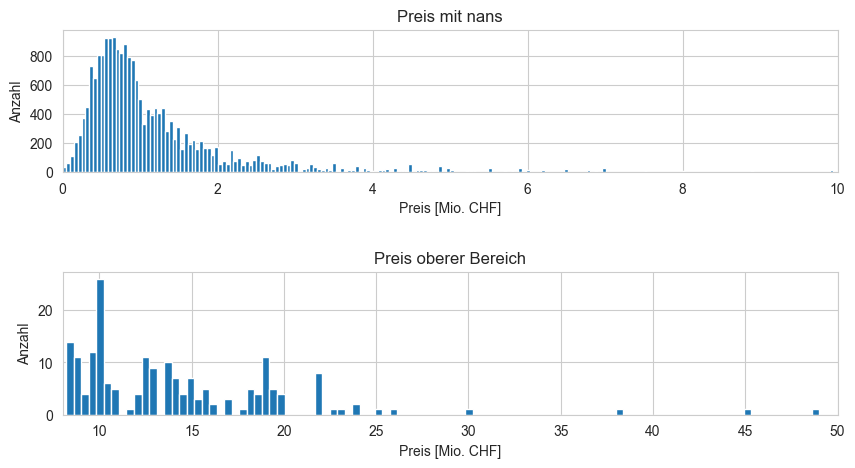

In [10]:
# Verteilung des Preises
fig, axs = plt.subplots(2, 1, figsize=(10, 5))
fig.subplots_adjust(hspace=0.7)
axs[0].hist(df['price_cleaned']/1000000, bins=1000)
axs[0].set_ylabel('Anzahl')
axs[0].set_title('Preis mit nans')
axs[0].set_xlabel('Preis [Mio. CHF]')
axs[0].set_xlim(0, 10)

temp = df[df['price_cleaned'] > 8000000]
axs[1].hist(temp['price_cleaned']/1000000, bins=100)
axs[1].set_ylabel('Anzahl')
axs[1].set_title('Preis oberer Bereich')
axs[1].set_xlabel('Preis [Mio. CHF]')
axs[1].set_xlim(8, 50)
plt.show()

???

### Wohnraum

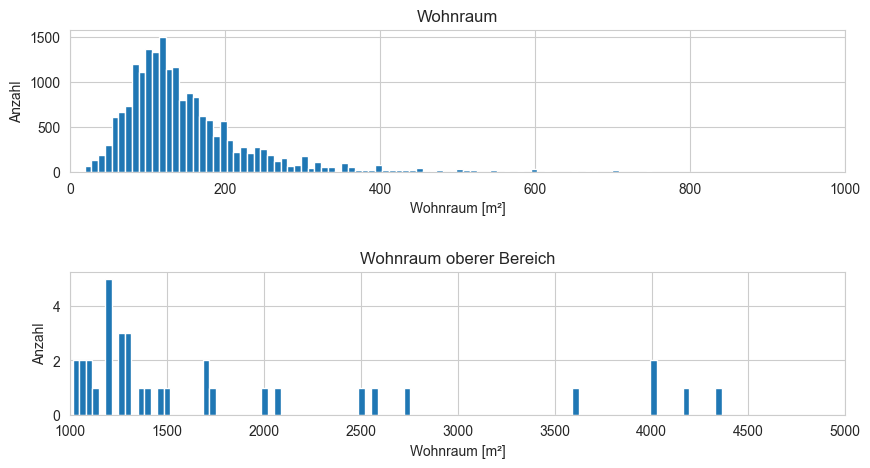

Anzahl nans: 886


In [11]:
# Verteilung des Wohnraums
fig, axs = plt.subplots(2, 1, figsize=(10, 5))
fig.subplots_adjust(hspace=0.7)
axs[0].hist(df['Space extracted'], bins=500)
axs[0].set_ylabel('Anzahl')
axs[0].set_title('Wohnraum')
axs[0].set_xlabel('Wohnraum [m²]')
axs[0].set_xlim(0, 1000)

temp = df[df['Space extracted'] > 1000]
axs[1].hist(temp['Space extracted'], bins=100)
axs[1].set_ylabel('Anzahl')
axs[1].set_title('Wohnraum oberer Bereich')
axs[1].set_xlabel('Wohnraum [m²]')
axs[1].set_xlim(1000, 5000)
plt.show()
print('Anzahl nans:', df['Space extracted'].isnull().sum())

Die Preise folgen etwa einer Normalverteilung. Jedoch ist es links mit 0 begrenzt und gegen rechts offen.

### Plot_area_unified

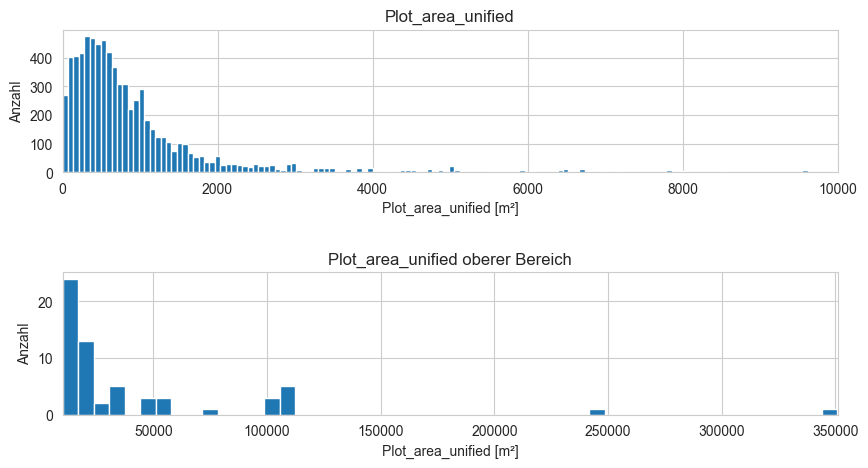

Anzahl nans: 13312


In [12]:
# Verteilung der Plot_area_unified
fig, axs = plt.subplots(2, 1, figsize=(10, 5))
fig.subplots_adjust(hspace=0.7)
axs[0].hist(df['Plot_area_unified'], bins=5000)
axs[0].set_ylabel('Anzahl')
axs[0].set_title('Plot_area_unified')
axs[0].set_xlabel('Plot_area_unified [m²]')
axs[0].set_xlim(0, 10000)

temp = df[df['Plot_area_unified'] > 10000]
axs[1].hist(temp['Plot_area_unified'], bins=50)
axs[1].set_ylabel('Anzahl')
axs[1].set_title('Plot_area_unified oberer Bereich')
axs[1].set_xlabel('Plot_area_unified [m²]')
axs[1].set_xlim(10000, 351000)
plt.show()
print('Anzahl nans:', df['Plot_area_unified'].isnull().sum())

Folgen einer Poisson-Verteilung. Es hat sehr viele nans.

### No. of rooms:

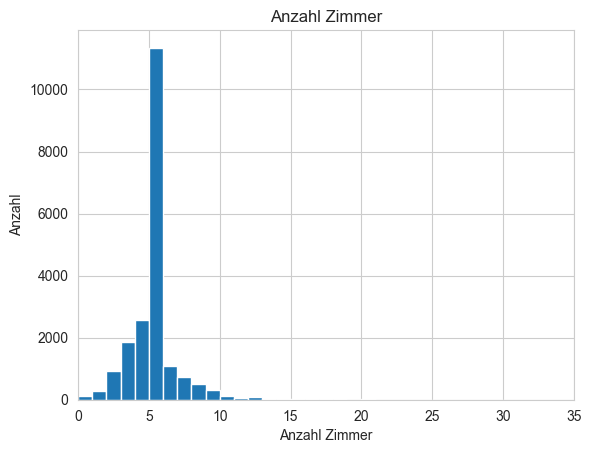

Anzahl nans: 684


In [13]:
# Verteilung der Anzahl Zimmer
df['No. of rooms:'].hist(bins=35)
plt.ylabel('Anzahl')
plt.title('Anzahl Zimmer')
plt.xlabel('Anzahl Zimmer')
plt.xlim(0, 35)
plt.show()
print('Anzahl nans:', df['No. of rooms:'].isnull().sum())

Eine Normalverteilung mit sehr vielen 5er Zimmern.

### Number of apartments:

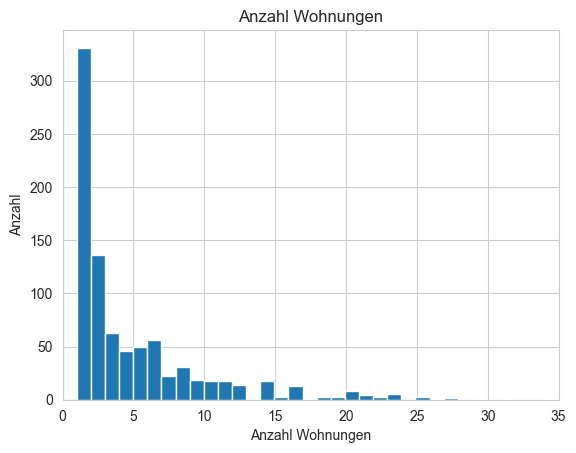

Anzahl nans: 19947


In [14]:
# Verteilung der Anzahl Wohnungen
df['Number of apartments:'].hist(bins=503)
plt.ylabel('Anzahl')
plt.title('Anzahl Wohnungen')
plt.xlabel('Anzahl Wohnungen')
plt.xlim(0, 35)
plt.show()
print('Anzahl nans:', df['Number of apartments:'].isnull().sum())

Eine Poisson-Verteilung. Fast alles nan Werte.

### Last refurbishment:

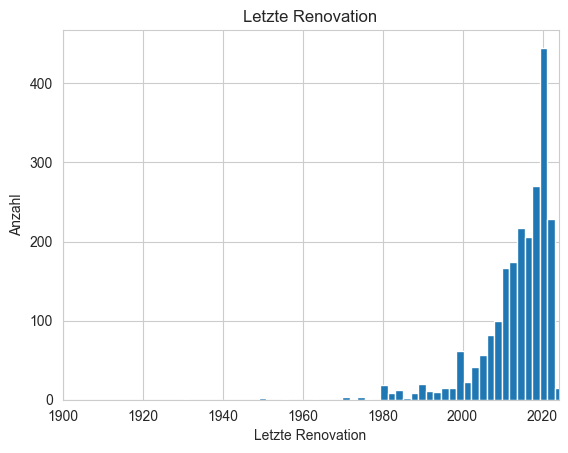

Anzahl nans: 18608


In [15]:
# Verteilung der letzten Renovation
temp = df[df['Last refurbishment:']>1000]
temp['Last refurbishment:'].hist(bins=50)
plt.ylabel('Anzahl')
plt.title('Letzte Renovation')
plt.xlabel('Letzte Renovation')
plt.xlim(1900, 2024)
plt.show()
print('Anzahl nans:', df['Last refurbishment:'].isnull().sum())

Die Immobilien wurden eher in den letzten Jahren renoviert. Es hat nur wenige Altbauten.

### Year built:

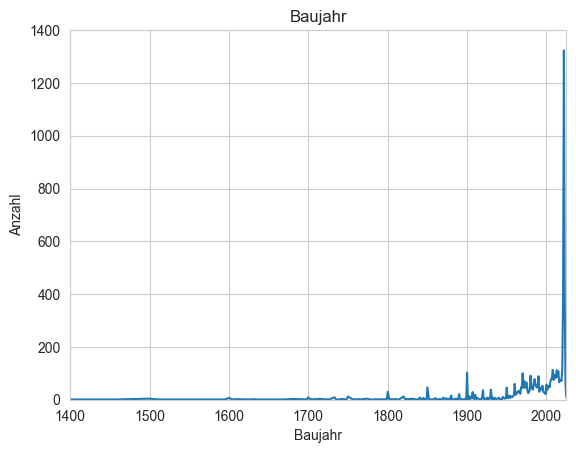

Anzahl nans: 14166


In [16]:
# Verteilung des Baujahrs
plt.plot(df['Year built:'].value_counts().sort_index())
plt.ylabel('Anzahl')
plt.title('Baujahr')
plt.xlabel('Baujahr')
plt.xlim(1400, 2025)
plt.ylim(0, 1400)
plt.show()
print('Anzahl nans:', df['Year built:'].isnull().sum())

Es gibt einige wenige sehr alte Immobilien. die meisten wurden aber in den letzten 100 Jahren gebaut. Es gibt einen markenten Peak um 1900 herum. evtl. ist das eine Schätzangabe welche gemacht wird, wenn das genaue Baujahr nicht bekannt ist.

### Number of floors:

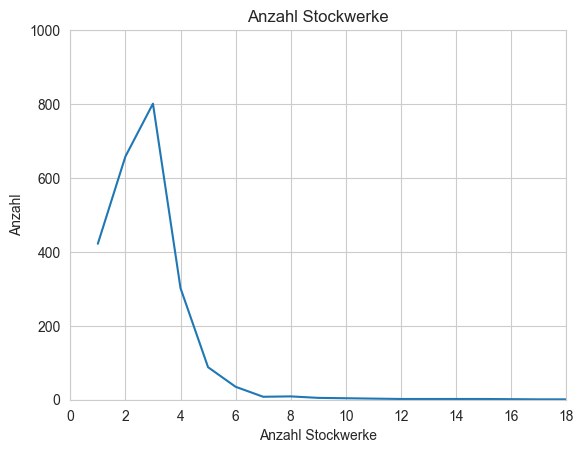

Anzahl nans: 18488


In [17]:
# Verteilung der Anzahl Stockwerke
plt.plot(df['Number of floors:'].value_counts().sort_index())
plt.ylabel('Anzahl')
plt.title('Anzahl Stockwerke')
plt.xlabel('Anzahl Stockwerke')
plt.xlim(0, 18)
plt.ylim(0, 1000)
plt.show()
print('Anzahl nans:', df['Number of floors:'].isnull().sum())

Die meisten Immobilien haben 2-3 Stockwerke. Es gibt aber auch sehr viele mit nur einem Stockwerk. Es fehlen aber sehr viele Werte.

## Analyse von Mustern bei fehlenden Werten
Da es viele Spalten mit fehlenden Werten gibt, wird im folgenden untersucht, ob es Muster gibt, wann Werte fehlen. Meine These lautet, das viele Werte aufgrund des Typs fehlen. Beispielsweise könnte es sein das bei Wohnungen die Grundstücksfläche fehlt, da diese nicht relevant ist.

### Vehlende Werte im bezug zu Type
#### Type und Availability

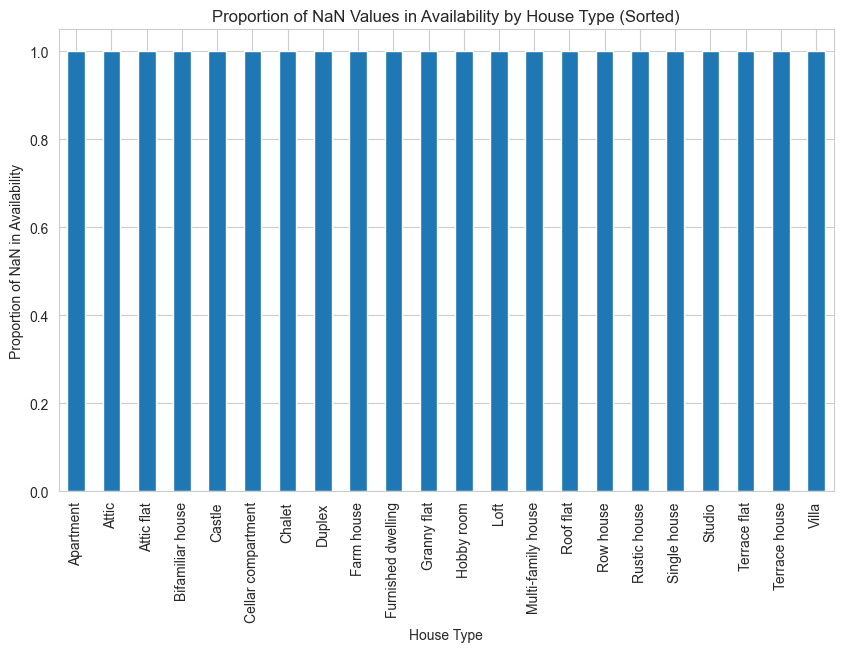

In [18]:
total_count_per_house_type = df.groupby('type').size()
nan_count_per_house_type = df[df['Availability'].isna()].groupby('type').size()
nan_proportion_per_house_type = (nan_count_per_house_type / total_count_per_house_type).fillna(0)
nan_proportion_non_zero = nan_proportion_per_house_type[nan_proportion_per_house_type > 0]
nan_proportion_per_house_type_sorted = nan_proportion_non_zero.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
nan_proportion_per_house_type_sorted.plot(kind='bar')
plt.xlabel('House Type')
plt.ylabel('Proportion of NaN in Availability')
plt.title('Proportion of NaN Values in Availability by House Type (Sorted)')
#plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

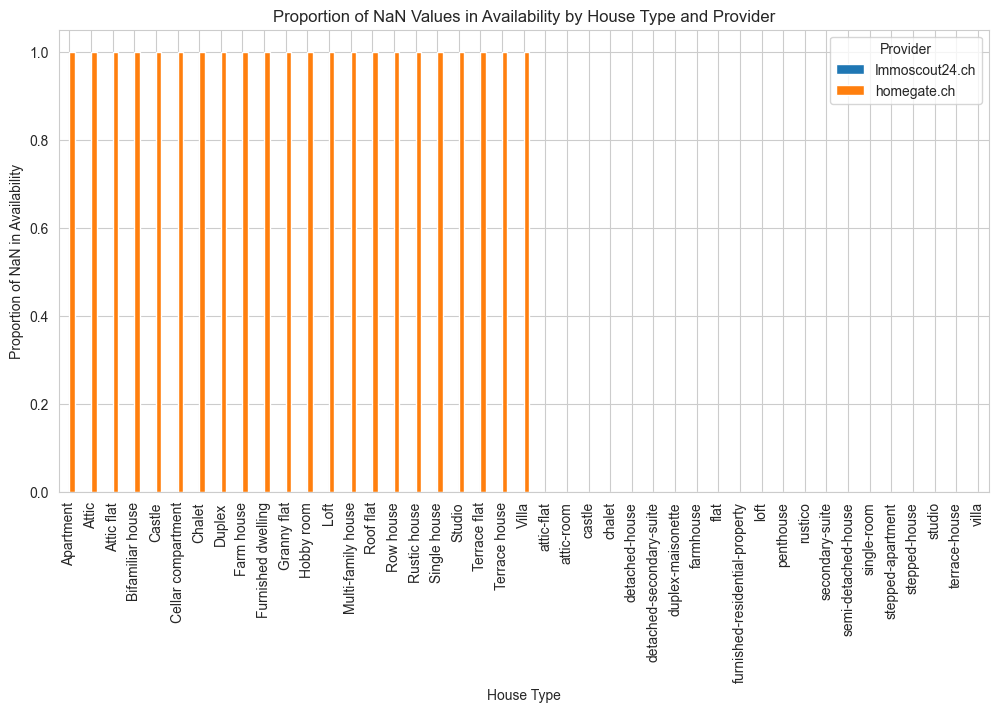

In [19]:
total_count_per_group = df.groupby(['type', 'provider']).size()
nan_count_per_group = df[df['Availability'].isna()].groupby(['type', 'provider']).size()
nan_proportion_per_group = (nan_count_per_group / total_count_per_group).unstack().fillna(0)

plt.figure(figsize=(12, 6))
nan_proportion_per_group.plot(kind='bar', stacked=False, figsize=(12, 6))
plt.xlabel('House Type')
plt.ylabel('Proportion of NaN in Availability')
plt.title('Proportion of NaN Values in Availability by House Type and Provider')
plt.legend(title='Provider')
plt.show()

Es scheint so als ob bei dem Portal Homegate.ch keine Availability angegeben wird. Es macht wahrscheinlich keinen Sinn, die Availability zu imputieren, da sie nicht relevant ist.

#### Type und Floor

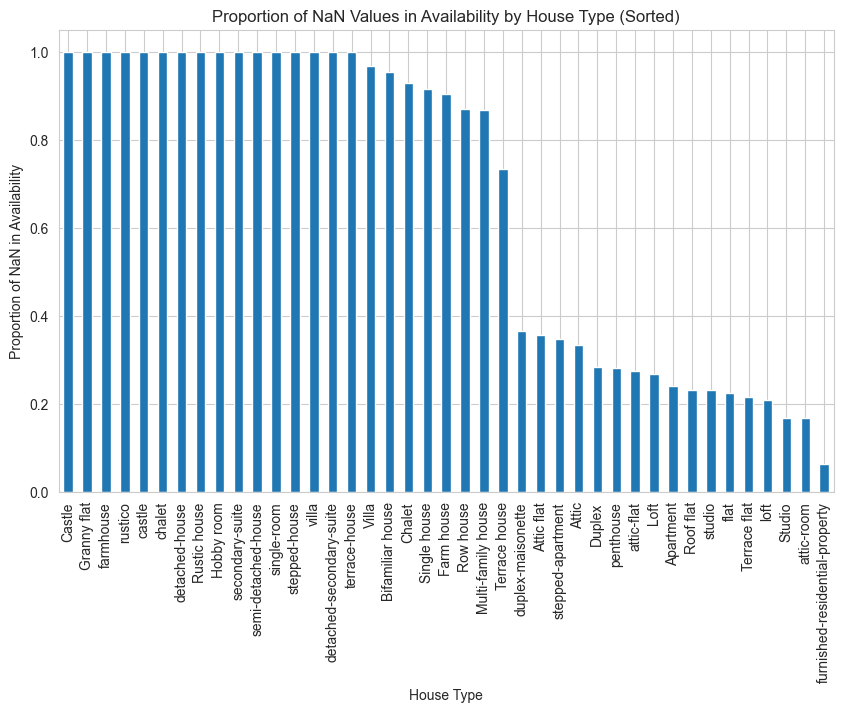

In [20]:
total_count_per_house_type = df.groupby('type').size()
nan_count_per_house_type = df[df['Floor'].isna()].groupby('type').size()
nan_proportion_per_house_type = (nan_count_per_house_type / total_count_per_house_type).fillna(0)
nan_proportion_non_zero = nan_proportion_per_house_type[nan_proportion_per_house_type > 0]
nan_proportion_per_house_type_sorted = nan_proportion_non_zero.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
nan_proportion_per_house_type_sorted.plot(kind='bar')
plt.xlabel('House Type')
plt.ylabel('Proportion of NaN in Availability')
plt.title('Proportion of NaN Values in Availability by House Type (Sorted)')
#plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

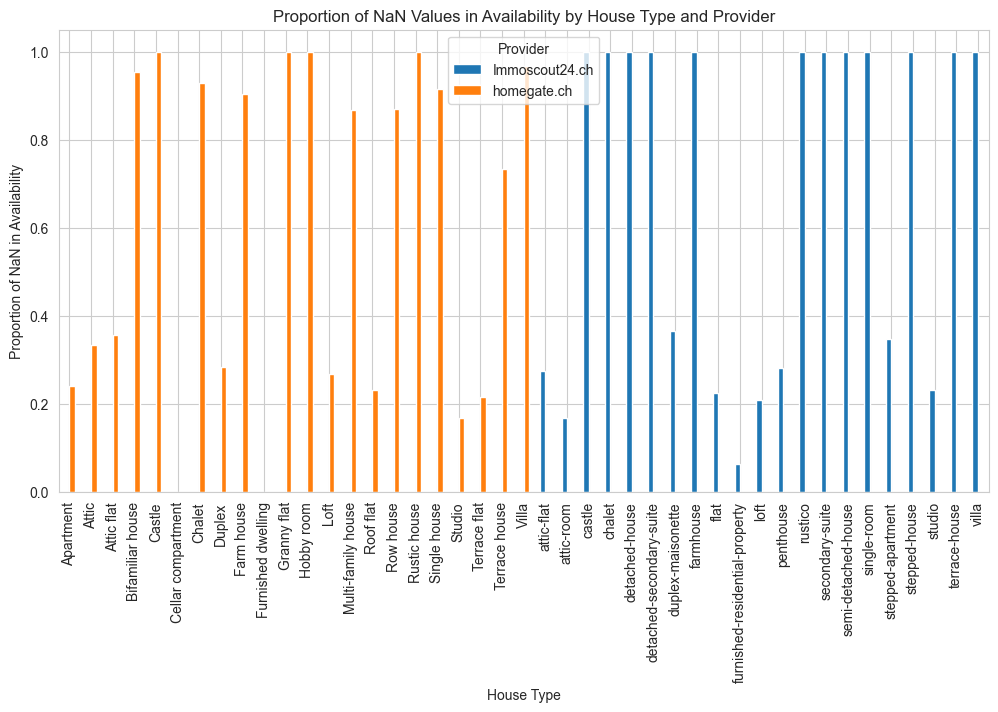

In [21]:
total_count_per_group = df.groupby(['type', 'provider']).size()
nan_count_per_group = df[df['Floor'].isna()].groupby(['type', 'provider']).size()
nan_proportion_per_group = (nan_count_per_group / total_count_per_group).unstack().fillna(0)

plt.figure(figsize=(12, 6))
nan_proportion_per_group.plot(kind='bar', stacked=False, figsize=(12, 6))
plt.xlabel('House Type')
plt.ylabel('Proportion of NaN in Availability')
plt.title('Proportion of NaN Values in Availability by House Type and Provider')
plt.legend(title='Provider')
plt.show()

### Type and detail_responsive#surface_usable

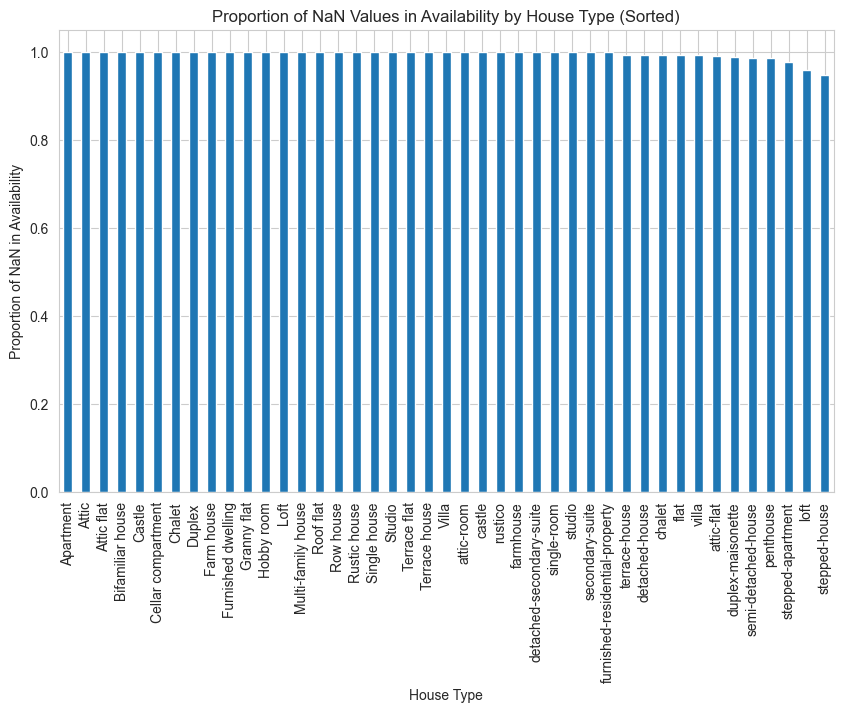

In [22]:
total_count_per_house_type = df.groupby('type').size()
nan_count_per_house_type = df[df['detail_responsive#surface_usable'].isna()].groupby('type').size()
nan_proportion_per_house_type = (nan_count_per_house_type / total_count_per_house_type).fillna(0)
nan_proportion_non_zero = nan_proportion_per_house_type[nan_proportion_per_house_type > 0]
nan_proportion_per_house_type_sorted = nan_proportion_non_zero.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
nan_proportion_per_house_type_sorted.plot(kind='bar')
plt.xlabel('House Type')
plt.ylabel('Proportion of NaN in Availability')
plt.title('Proportion of NaN Values in Availability by House Type (Sorted)')
#plt.tight_layout()
plt.show()

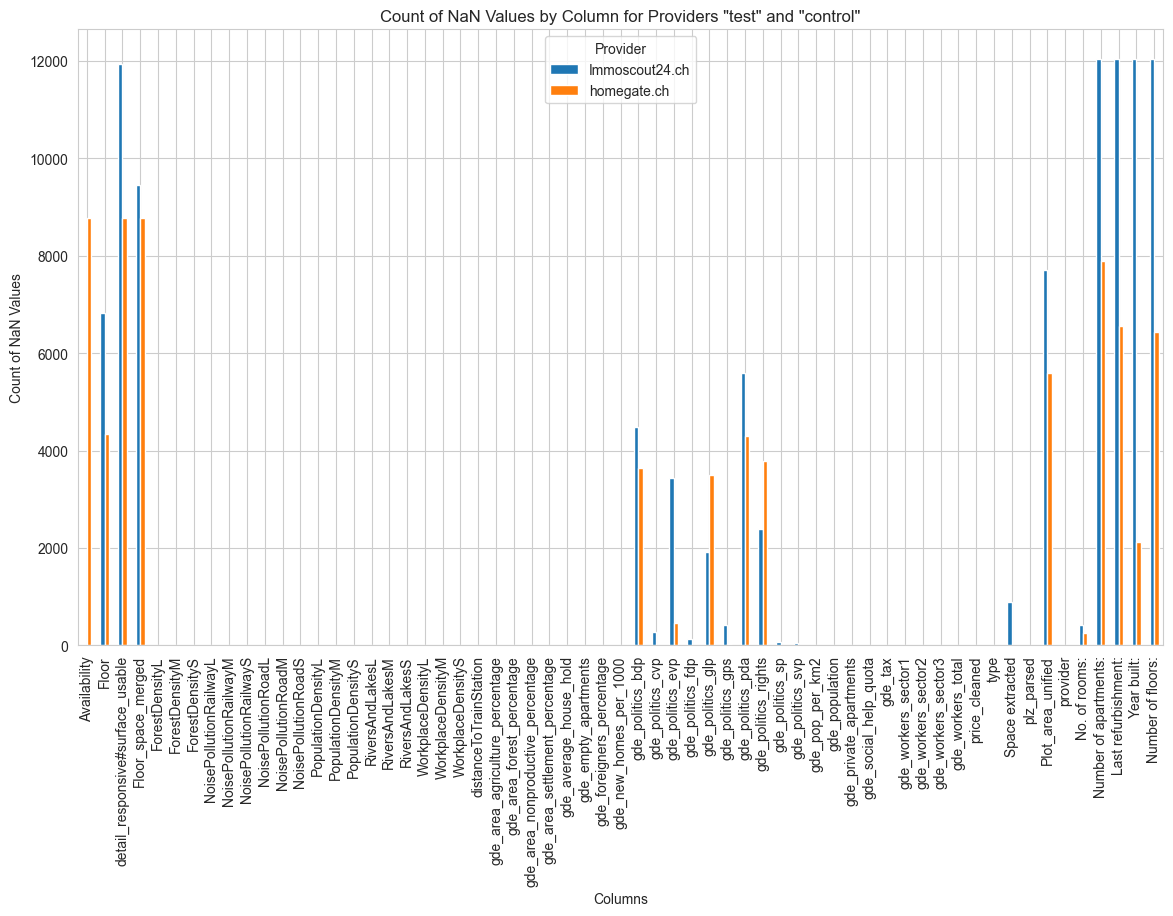

Anzahl Datenpunkte pro Provider:
provider
Immoscout24.ch    12044
homegate.ch        8785
Name: count, dtype: int64


In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your dataframe
# Replace 'provider' with the actual name of the provider column

# Filter the dataframe for the specific providers you are interested in, say 'test' and 'control'
providers_to_compare = ['homegate.ch', 'Immoscout24.ch']
df_filtered_providers = df[df['provider'].isin(providers_to_compare)]

# Initialize an empty dictionary to hold the count of NaN values per column for each provider
nan_counts_comparison = {}

# Loop through each provider and calculate the count of NaN values per column
for provider in df_filtered_providers['provider'].unique():
    nan_counts_comparison[provider] = df_filtered_providers[df_filtered_providers['provider'] == provider].isna().sum()

# Convert the dictionary to a DataFrame
nan_counts_comparison_df = pd.DataFrame(nan_counts_comparison)

# Plotting the results
nan_counts_comparison_df.plot(kind='bar', figsize=(14, 8), stacked=False)
plt.xlabel('Columns')
plt.ylabel('Count of NaN Values')
plt.title('Count of NaN Values by Column for Providers "test" and "control"')
plt.legend(title='Provider')
plt.show()

print('Anzahl Datenpunkte pro Provider:')
print(df_filtered_providers['provider'].value_counts())


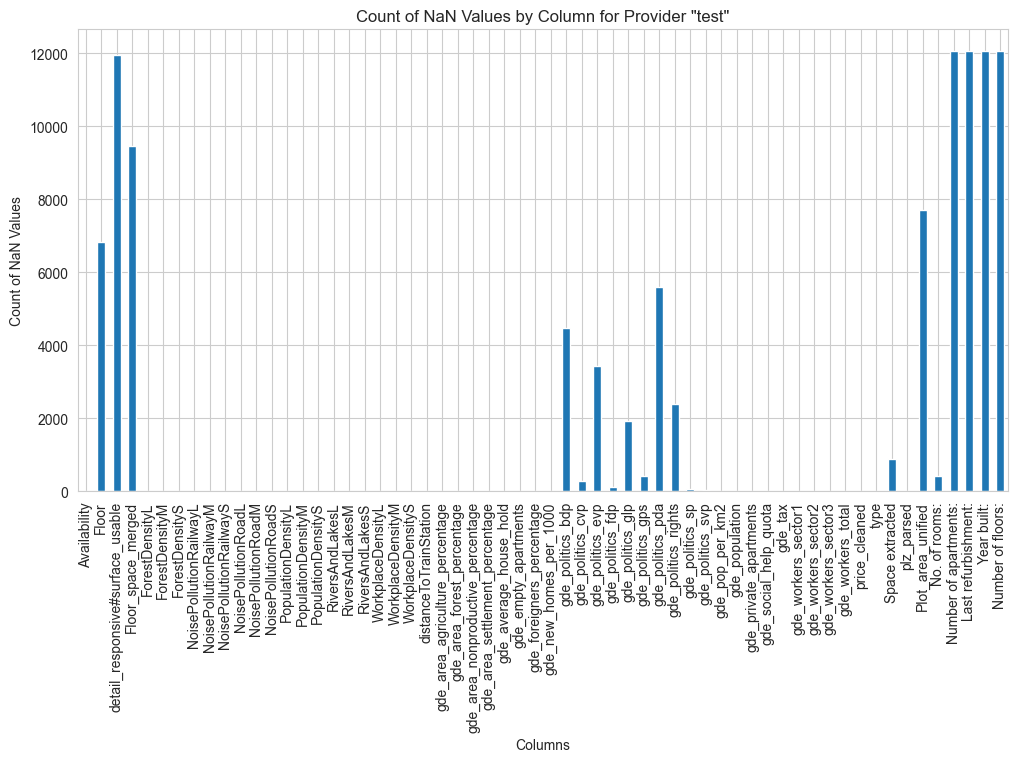

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your dataframe
# Replace 'provider' with the actual name of the provider column

# Filter the dataframe for the specific provider named 'test'
df_test_provider = df[df['provider'] == 'Immoscout24.ch']

# Initialize an empty dictionary to hold the count of NaN values per column for the provider 'test'
nan_counts_test = {}

# Loop through each column (excluding 'provider') and calculate the count of NaN values for provider 'test'
for col in df_test_provider.columns:
    if col != 'provider':  # Skip the 'provider' column itself
        nan_counts_test[col] = df_test_provider[col].isna().sum()

# Create a DataFrame from the dictionary
nan_counts_test_df = pd.DataFrame.from_dict(nan_counts_test, orient='index', columns=['NaN Count'])

# Plotting the results
nan_counts_test_df.plot(kind='bar', figsize=(12, 6), stacked=False, legend=False)
plt.xlabel('Columns')
plt.ylabel('Count of NaN Values')
plt.title('Count of NaN Values by Column for Provider "test"')
plt.show()